# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [42]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-04 10:20:15--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9567703ec89973018a9032a148.dl.dropboxusercontent.com/cd/0/inline/CQapQt_x01f1N1PwRrkOT5HI5fkqJqLtpPONmwCtVwC4GHRd7f2ti0v5KagvECPsAX8C5BmAlo-oDZsUwWsTGYTUVkEJWy_Pm2mNgunK6-eyxgOgzsn5J4cvMuCYVDp-BXDbAj59EtZ1C-ihT7om1Qea/file# [following]
--2024-04-04 10:20:15--  https://uc9567703ec89973018a9032a148.dl.dropboxusercontent.com/cd/0/inline/CQapQt_x01f1N1PwRrkOT5HI5fkqJqLtpPONmwCtVwC4GHRd7f2ti0v5KagvECPsAX8C5BmAlo-oDZsUwWsTGYTUVkEJWy_Pm2mNgunK6-eyxgOgzsn5J4cvMuCYVDp-BXDbAj59EtZ1C-ihT7om1Qea/file
Resolving uc9567703ec89973018a9032a148.dl.dropboxusercontent.com (uc9567703ec89973018a9032a148.dl.dropboxusercontent.com)... 162.125.4.15, 2620

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [43]:
file_path = '/HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value

df = pd.read_csv(file_path)
print(df.head())
print()
print("Missing Values Before Imputation:")
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  

Missing Values Before Imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Missing Values After Imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO

Get a brief description of the dataset

In [44]:
# TODO: you can use .info() and .description()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [45]:
# TODO: drop MEDV and convert to numpy array
X = df.drop(columns=['MEDV']).values
print(type(X))
print(X[:5])

<class 'numpy.ndarray'>
[[6.32000000e-03 1.80000000e+01 2.31000000e+00 0.00000000e+00
  5.38000000e-01 6.57500000e+00 6.52000000e+01 4.09000000e+00
  2.96000000e+02 1.53000000e+01 3.96900000e+02 4.98000000e+00]
 [2.73100000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 6.42100000e+00 7.89000000e+01 4.96710000e+00
  2.42000000e+02 1.78000000e+01 3.96900000e+02 9.14000000e+00]
 [2.72900000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 7.18500000e+00 6.11000000e+01 4.96710000e+00
  2.42000000e+02 1.78000000e+01 3.92830000e+02 4.03000000e+00]
 [3.23700000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 6.99800000e+00 4.58000000e+01 6.06220000e+00
  2.22000000e+02 1.87000000e+01 3.94630000e+02 2.94000000e+00]
 [6.90500000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 7.14700000e+00 5.42000000e+01 6.06220000e+00
  2.22000000e+02 1.87000000e+01 3.96900000e+02 1.27154321e+01]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

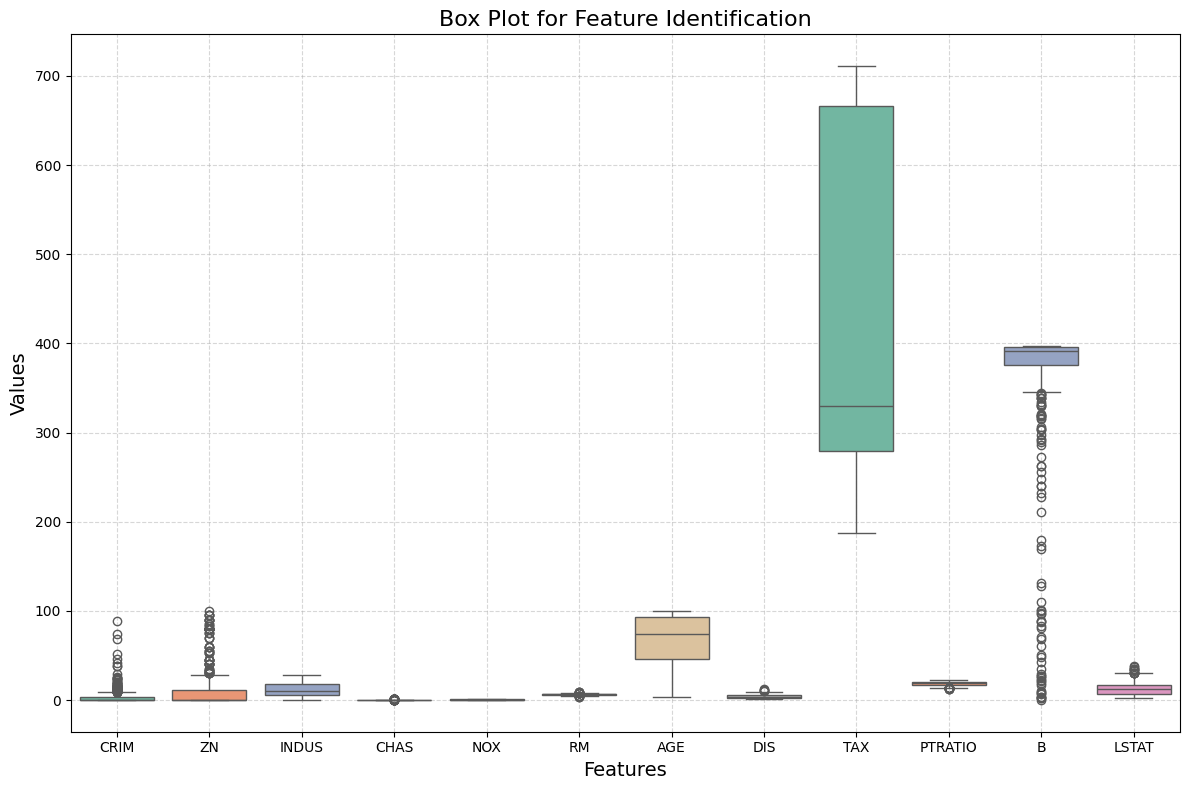

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['MEDV']), palette='Set2')
plt.title('Box Plot for Feature Identification', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [47]:
q1 = df.quantile(1/4)
q3 = df.quantile(3/4)
iqr = q3 - q1
outliers = (df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))

print(outliers.any())
print()

if outliers.any().any():
    print("Outliers detected! Applying StandardScaler to scale the data.")
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
else:
    print("No outliers detected. No need for scaling.")

CRIM        True
ZN          True
INDUS      False
CHAS        True
NOX        False
RM          True
AGE        False
DIS         True
TAX        False
PTRATIO     True
B           True
LSTAT       True
MEDV        True
dtype: bool

Outliers detected! Applying StandardScaler to scale the data.


add polynomial features to increase model complexity!



In [48]:
degree = 2
poly_X = PolynomialFeatures(degree=degree)
X = poly_X.fit_transform(X)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [49]:
# TODO: extract the MEDV
y = df['MEDV'].values
print(type(y))
print(y[:5])

<class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2]


Split the dataset into two parts such that the training set contains 80% of the samples.

In [50]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [51]:
# TODO: Use sklearn
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

Coefficients of the variables in the sklearn: [0.0, 2.424, -0.796, 0.354, -3.499, -2.373, 3.376, -1.475, -3.158, -1.212, -1.455, 0.412, -3.044, 0.188, -4.53, 3.145, 2.413, -3.331, 0.451, -0.391, -1.883, -2.725, -4.229, -0.031, 0.219, -0.12, 0.214, 0.084, -1.482, -0.028, 0.294, -0.207, 2.037, -0.443, -2.146, -0.762, 1.211, 0.827, 0.525, -0.018, 1.945, 3.152, -1.447, -0.497, 0.726, -1.545, 1.519, -2.047, -1.178, -0.017, -0.353, 1.269, -0.78, -0.641, -0.449, -0.416, -0.595, 0.039, 2.574, 1.807, -1.283, -0.194, 1.117, 0.24, -0.994, -0.431, -1.199, -0.597, 0.048, -0.61, 0.244, 0.633, -0.876, -0.316, -1.555, -1.699, 2.171, -2.923, -0.136, 0.525, 0.03, 0.404, 3.203, -0.805, -1.742, -0.158, 0.074, 0.596, -0.374, -0.162, 0.913]


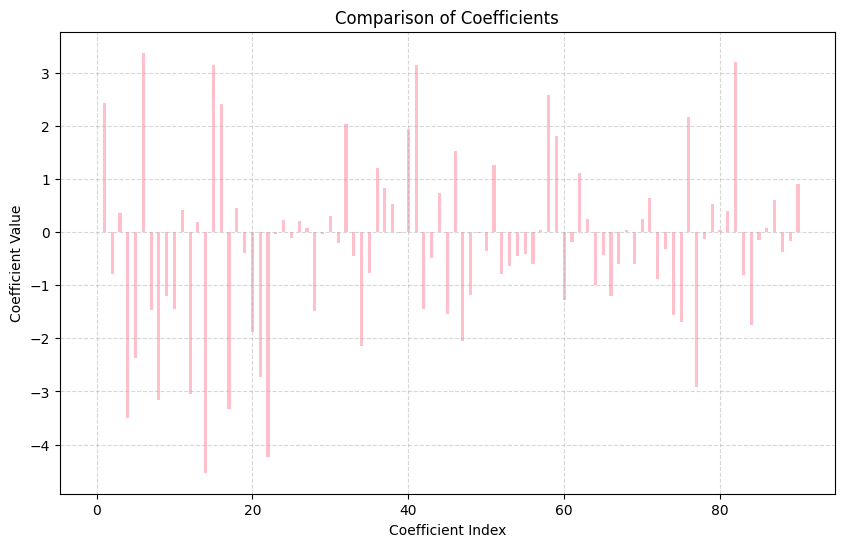

In [52]:
coefficients = linear_regressor.coef_
print("Coefficients of the variables in the sklearn:", list(map(lambda x: round(x, 3), coefficients)))

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients, width=0.4, color='pink', align='center')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [53]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred = linear_regressor.predict(X_train)
linear_r2_train = r2_score(y_train, y_train_pred)
linear_mse_train = mean_squared_error(y_train, y_train_pred)

print("R² score on the training dataset:", linear_r2_train)
print("Mean Squared Error on the training dataset:", linear_mse_train)

R² score on the training dataset: 0.9139469574279985
Mean Squared Error on the training dataset: 6.9967239263101435


Predict the value of "y" for each "x" belonging to the "testing" set

In [54]:
y_test_pred = linear_regressor.predict(X_test)
linear_r2_test = r2_score(y_test, y_test_pred)
linear_mse_test = mean_squared_error(y_test, y_test_pred)

print("R² score on the test dataset:", linear_r2_test)
print("Mean Squared Error on the test dataset:", linear_mse_test)

R² score on the test dataset: 0.8015930087911027
Mean Squared Error on the test dataset: 19.164990396107097


# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [55]:
# TODO: Use Lasso from sklearn library
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

Lasso()

Get the coefficients of the variables and visualize it.

Coefficients of the variables in Lasso regression: [0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 2.283, -0.0, -0.0, -0.143, -0.702, 0.0, -3.319, -0.106, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.056, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.234, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.779, -0.0, 0.0, -0.0, -0.639, 0.0, -0.222, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.248, -0.0, 0.0]


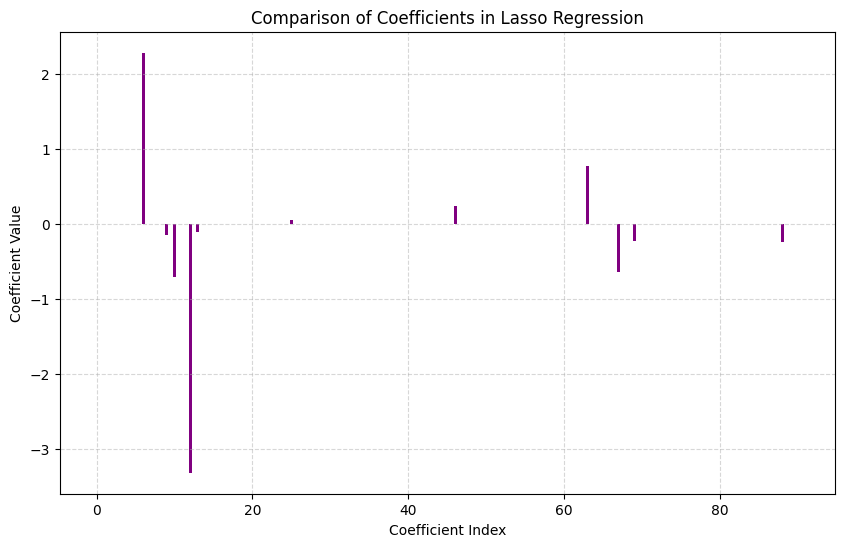

In [56]:
lasso_coefficients = lasso_regressor.coef_
print("Coefficients of the variables in Lasso regression:", list(map(lambda x: round(x, 3), lasso_coefficients)))

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(lasso_coefficients)), lasso_coefficients, width=0.4, color='purple', align='center')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients in Lasso Regression')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1- What observations can you make about the weight distribution when applying L1 regularization?


    Your Answer Goes here.

    When applying L1 regularization (Lasso), we observe that many of the coefficients of the features become exactly zero.
    This indicates that L1 regularization encourages sparsity in the model by driving some coefficients to zero, effectively selecting a subset of the most important features while disregarding the less important ones.
    This can be beneficial in situations where there are many irrelevant or redundant features, as it helps simplify the model and improve interpretability.
    Additionally, the non-zero coefficients tend to have lower magnitudes compared to those obtained from models without regularization, which can prevent overfitting and enhance the model's generalization performance.
    Overall, L1 regularization provides a mechanism for feature selection and contributes to building more parsimonious and interpretable models.

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    Let's See ...

For alpha: 0.01, the Zero Coefficients Count: 15, Non-zero Coefficients Count: 76


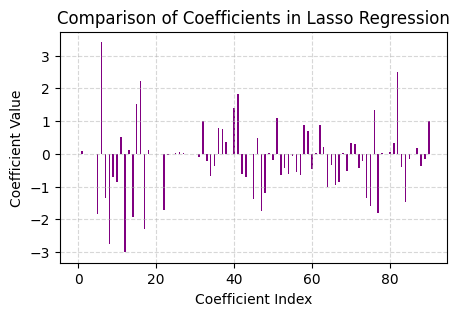

For alpha: 0.1, the Zero Coefficients Count: 47, Non-zero Coefficients Count: 44


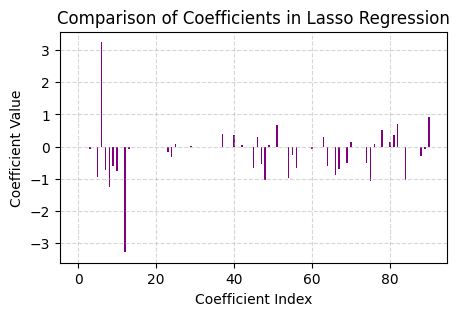

For alpha: 0.2, the Zero Coefficients Count: 57, Non-zero Coefficients Count: 34


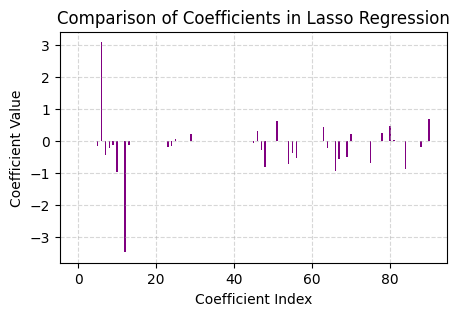

For alpha: 0.3, the Zero Coefficients Count: 63, Non-zero Coefficients Count: 28


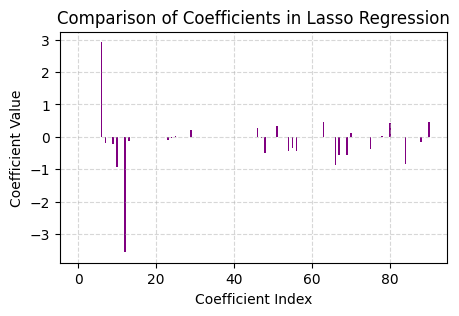

For alpha: 0.4, the Zero Coefficients Count: 67, Non-zero Coefficients Count: 24


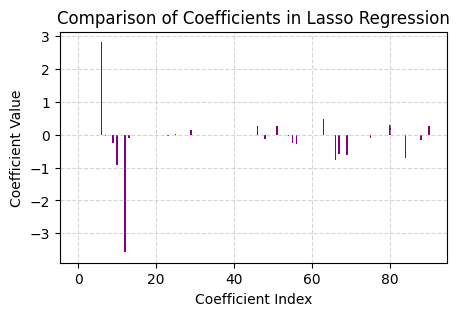

For alpha: 0.5, the Zero Coefficients Count: 71, Non-zero Coefficients Count: 20


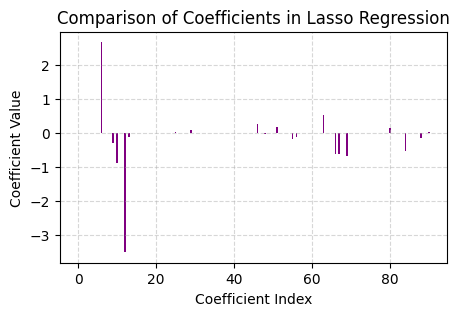

For alpha: 0.75, the Zero Coefficients Count: 79, Non-zero Coefficients Count: 12


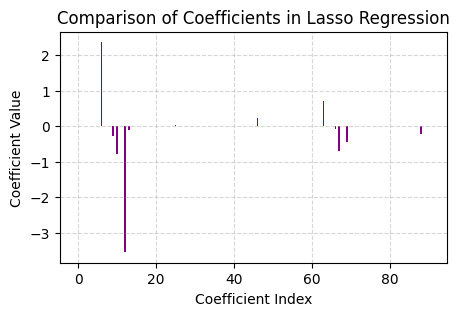

For alpha: 1.0, the Zero Coefficients Count: 80, Non-zero Coefficients Count: 11


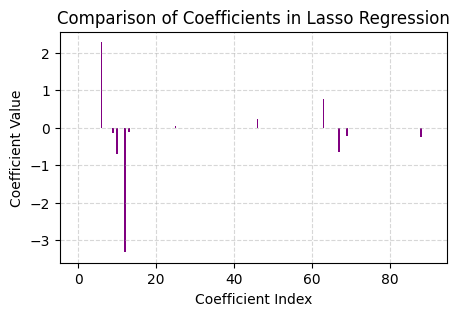

For alpha: 2.0, the Zero Coefficients Count: 82, Non-zero Coefficients Count: 9


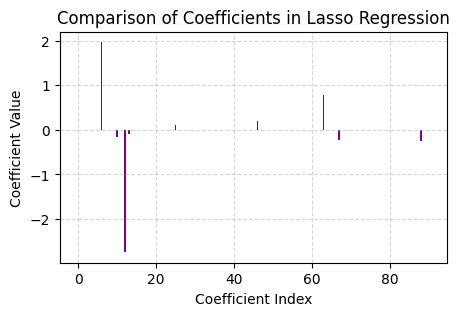

For alpha: 5.0, the Zero Coefficients Count: 84, Non-zero Coefficients Count: 7


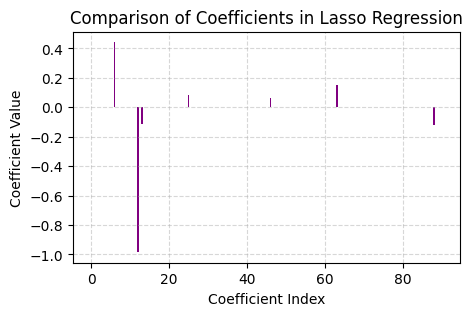

In [57]:
alphas = np.array([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 2, 5])
coefficients_list = []
for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)

    lasso_coefficients = lasso_regressor.coef_
    zero_count = np.count_nonzero(lasso_coefficients == 0)
    non_zero_count = len(lasso_coefficients) - zero_count
    print(f"For alpha: {alpha}, the Zero Coefficients Count: {zero_count}, Non-zero Coefficients Count: {non_zero_count}")

    plt.figure(figsize=(5, 3))
    plt.bar(np.arange(len(lasso_coefficients)), lasso_coefficients, width=0.4, color='purple', align='center')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.title('Comparison of Coefficients in Lasso Regression')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    Your Answer Goes here.

    Different values of the regularization parameter (alpha) affect the sparsity of the model coefficients as follows:
    1. Low Alpha (0.1, 0.2, ...): With a low alpha value, fewer coefficients are forced to zero, resulting in a higher number of non-zero coefficients.
        In this case, the model tends to retain more features, leading to lower sparsity.
    2. High Alpha (..., 0.8, 0.9): As the alpha value increases, more coefficients are penalized and forced to zero, leading to a higher number of zero coefficients.
        Consequently, the model becomes sparser as it discards more features.
    Therefore, increasing the alpha parameter tends to increase the sparsity of the model coefficients, while decreasing alpha leads to less sparsity and more non-zero coefficients.

Get the score value on train dataset

In [58]:
lasso_regressor = Lasso(0.5)
lasso_regressor.fit(X_train, y_train)

y_train_pred = lasso_regressor.predict(X_train)
lasso_r2_train = r2_score(y_train, y_train_pred)
lasso_mse_train = mean_squared_error(y_train, y_train_pred)

print("R² score on the training dataset:", lasso_r2_train)
print("Mean Squared Error on the training dataset:", lasso_mse_train)

R² score on the training dataset: 0.7955374363707255
Mean Squared Error on the training dataset: 16.624259505788928


Predict the value of "y" for each "x" belonging to the "testing" set

In [59]:
y_test_pred = lasso_regressor.predict(X_test)
lasso_r2_test = r2_score(y_test, y_test_pred)
lasso_mse_test = mean_squared_error(y_test, y_test_pred)

print("R² score on the test dataset:", lasso_r2_test)
print("Mean Squared Error on the test dataset:", lasso_mse_test)

R² score on the test dataset: 0.8281022677550322
Mean Squared Error on the test dataset: 16.604346285957217


    It is true that the value of the evaluated score is higher for regressions with lower alpha and in this sense they are stronger,
    but in order to choose the most appropriate alpha argument for the regressor, other factors such as simplicity, sparsity of coefficients and overfitting, etc. should be considered.

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [60]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

Ridge()

Get the coefficients of the variables and visualize it.

Coefficients of the variables in Ridge regression: [0.0, 1.396, -0.292, 0.11, -1.672, -2.073, 3.355, -1.391, -2.868, -0.939, -1.051, 0.449, -3.009, 0.16, -2.655, 2.076, 2.274, -2.706, 0.394, -0.13, -0.977, -1.576, -2.399, -0.026, 0.172, -0.023, 0.155, 0.088, -0.858, -0.113, 0.171, -0.208, 1.52, -0.387, -1.429, -0.667, 0.973, 0.816, 0.668, -0.092, 1.694, 2.57, -1.098, -0.526, 0.499, -1.543, 0.974, -1.928, -1.16, 0.031, -0.318, 1.188, -0.702, -0.601, -0.526, -0.391, -0.564, -0.414, 1.762, 1.369, -1.068, 0.046, 1.154, 0.208, -1.033, -0.378, -1.085, -0.752, 0.046, -0.598, 0.325, 0.422, -0.643, -0.275, -1.558, -1.688, 1.791, -2.34, -0.045, 0.26, 0.14, 0.416, 2.808, -0.819, -1.653, -0.174, 0.214, 0.436, -0.365, -0.165, 0.937]


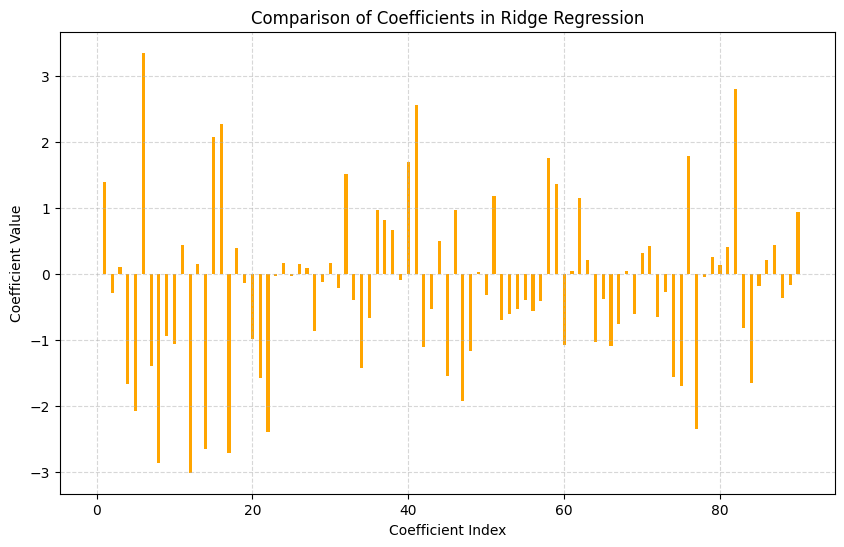

In [61]:
ridge_coefficients = ridge_regressor.coef_
print("Coefficients of the variables in Ridge regression:", list(map(lambda x: round(x, 3), ridge_coefficients)))

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(ridge_coefficients)), ridge_coefficients, width=0.4, color='orange', align='center')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients in Ridge Regression')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1. Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

        Your answer goes here

        Sure, here's a summary of the key differences between L1 (Lasso) and L2 (Ridge) regularization:
        1. Sparsity:
            - L1 regularization tends to produce sparse solutions by setting some coefficients to exactly zero.
            - L2 regularization does not typically yield sparse solutions; it shrinks coefficients towards zero but rarely sets them exactly to zero.
        2. Feature Selection:
            - L1 regularization inherently performs feature selection by eliminating some coefficients, which can be useful when dealing with high-dimensional data.
            - L2 regularization does not perform feature selection but rather shrinks all coefficients uniformly.
        In essence, L1 regularization tends to favor sparsity and feature selection, while L2 regularization encourages smaller coefficients without necessarily eliminating any features.


 2. How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

    Let's Check...

Alpha: 0.1, Significantly Affected Coefficients Count: 0


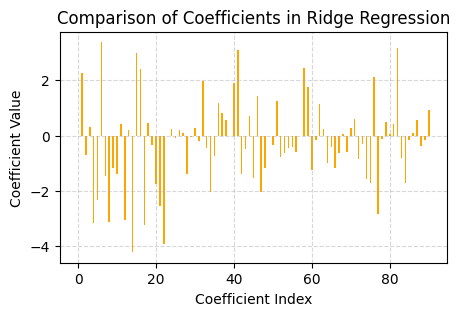

Alpha: 0.5, Significantly Affected Coefficients Count: 7


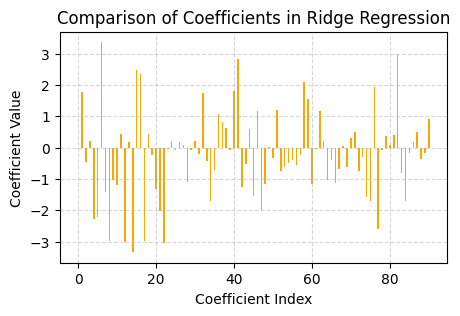

Alpha: 1.0, Significantly Affected Coefficients Count: 16


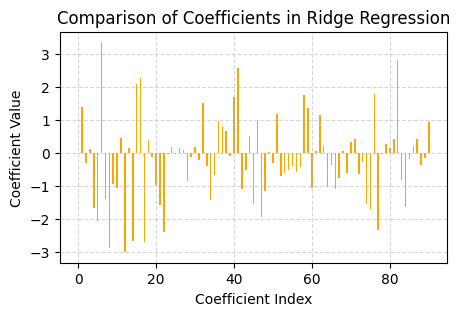

Alpha: 2.0, Significantly Affected Coefficients Count: 22


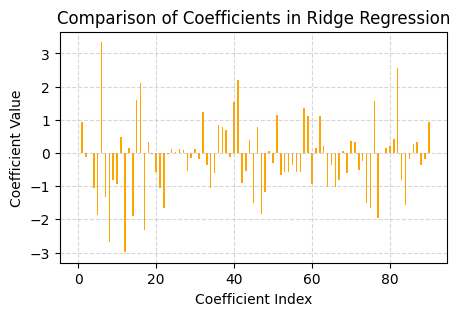

Alpha: 5.0, Significantly Affected Coefficients Count: 31


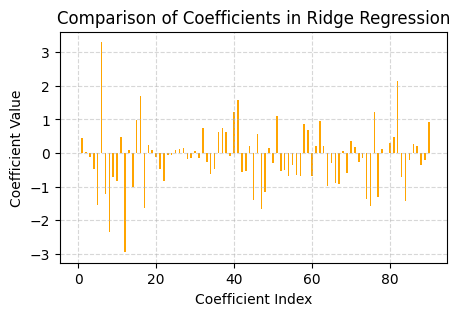

Alpha: 10.0, Significantly Affected Coefficients Count: 36


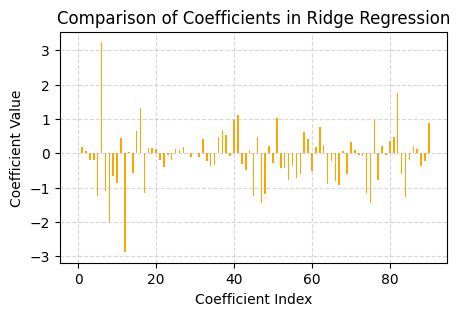

Alpha: 20.0, Significantly Affected Coefficients Count: 42


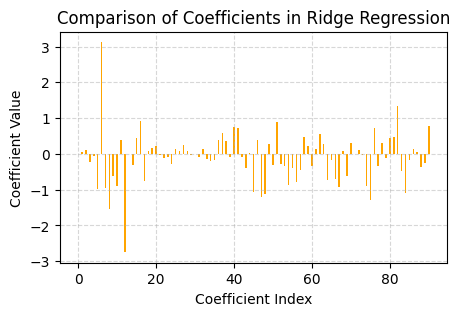

Alpha: 50.0, Significantly Affected Coefficients Count: 52


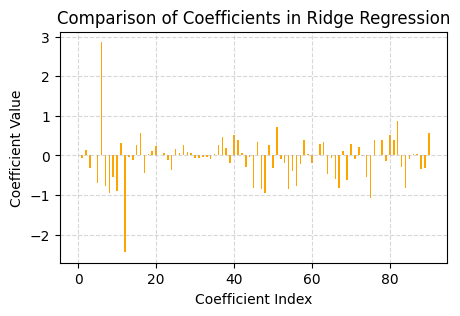

Alpha: 75.0, Significantly Affected Coefficients Count: 53


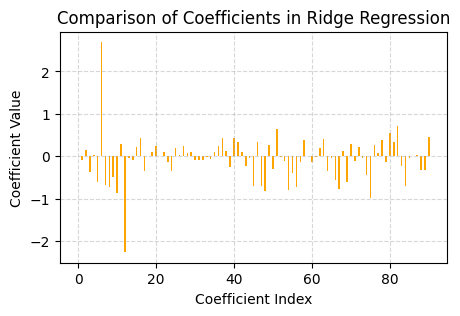

Alpha: 100.0, Significantly Affected Coefficients Count: 54


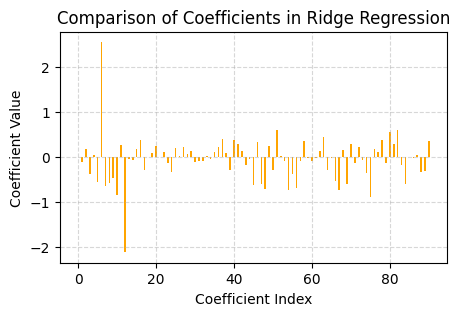

In [62]:
alphas = np.array([0.1, 0.5, 1, 2, 5, 10, 20, 50, 75, 100])
coefficients_list = []
for alpha in alphas:
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)
    ridge_coefficients = ridge_regressor.coef_

    coefficients_difference = ridge_coefficients - linear_regressor.coef_
    threshold = 0.5
    significantly_affected_indices = np.where(abs(coefficients_difference) > threshold)[0]
    print(f"Alpha: {alpha}, Significantly Affected Coefficients Count: { len(significantly_affected_indices)}")

    plt.figure(figsize=(5, 3))
    plt.bar(np.arange(len(ridge_coefficients)), ridge_coefficients, width=0.4, color='orange', align='center')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.title('Comparison of Coefficients in Ridge Regression')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

        Your answer goes here

        As the regularization parameter (alpha) increases in Ridge Regression, the magnitude of the coefficients tends to decrease.
        With higher alpha values, more coefficients are significantly affected, meaning they are pushed towards zero, leading to a sparser model with smaller coefficient magnitudes.
        This regularization helps prevent overfitting by reducing the complexity of the model and promoting simpler solutions.

Get the score value on train *dataset*

In [63]:
# TODO: Calculate R² score and MSE on the training dataset
ridge_regressor = Ridge(alpha=10)
ridge_regressor.fit(X_train, y_train)

y_train_pred = ridge_regressor.predict(X_train)
ridge_r2_train = r2_score(y_train, y_train_pred)
ridge_mse_train = mean_squared_error(y_train, y_train_pred)

print("R² score on the training dataset:", ridge_r2_train)
print("Mean Squared Error on the training dataset:", ridge_mse_train)

R² score on the training dataset: 0.9039822071925022
Mean Squared Error on the training dataset: 7.806928938341713


Predict the value of "y" for each "x" belonging to the "testing" set



In [64]:
y_test_pred = ridge_regressor.predict(X_test)
ridge_r2_test = r2_score(y_test, y_test_pred)
ridge_mse_test = mean_squared_error(y_test, y_test_pred)

print("R² score on the test dataset:", ridge_r2_test)
print("Mean Squared Error on the test dataset:", ridge_mse_test)

R² score on the test dataset: 0.8479555245174866
Mean Squared Error on the test dataset: 14.686634249372366


# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [67]:
linear_regression_metrics = {
    'MSE(Test)': linear_mse_test,
    'MSE(Train)': linear_mse_train,
    'R² Score (Test)': linear_r2_test,
    'R² Score (Train)': linear_r2_train
}

lasso_regression_metrics = {
    'MSE(Test)': lasso_mse_test,
    'MSE(Train)': lasso_mse_train,
    'R² Score (Test)': lasso_r2_test,
    'R² Score (Train)': lasso_r2_train
}

ridge_regression_metrics = {
    'MSE(Test)': ridge_mse_test,
    'MSE(Train)': ridge_mse_train,
    'R² Score (Test)': ridge_r2_test,
    'R² Score (Train)': ridge_r2_train
}

df_linear_regression = pd.DataFrame({'Model': ['Linear Regression'], **linear_regression_metrics})
df_lasso_regression = pd.DataFrame({'Model': ['Lasso Regression'], **lasso_regression_metrics})
df_ridge_regression = pd.DataFrame({'Model': ['Ridge Regression'], **ridge_regression_metrics})

df_summary = pd.concat([df_linear_regression, df_lasso_regression, df_ridge_regression], ignore_index=True)
print(df_summary)

               Model  MSE(Test)  MSE(Train)  R² Score (Test)  R² Score (Train)
0  Linear Regression  19.164990    6.996724         0.801593          0.913947
1   Lasso Regression  16.604346   16.624260         0.828102          0.795537
2   Ridge Regression  14.686634    7.806929         0.847956          0.903982


1. *Which model performed best on the test data?*
2. *Why the results on train data are different? Discuss why this might be the case.*

          your answer goes here.

          1. Ridge had the best performance in the test data, followed by Lasso, and finally, the Linear model had a weaker performance than those models mentioned on the test data.
        
          2. The observed difference in performance between the training and test datasets reflects the common machine learning challenge of overfitting.
            While the basic linear model may fit the training data closely due to its flexibility, it often fails to generalize well to unseen data, resulting in poorer performance on the test dataset.
            Regularized models like Lasso and Ridge Regression address this issue by introducing penalties that constrain the model's complexity, leading to better generalization performance.
            In this case, Ridge Regression emerges as the preferred model due to its ability to balance bias and variance, resulting in better performance on the test dataset compared to Lasso and the basic linear model.
